In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None

Mô tả thống kê:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean

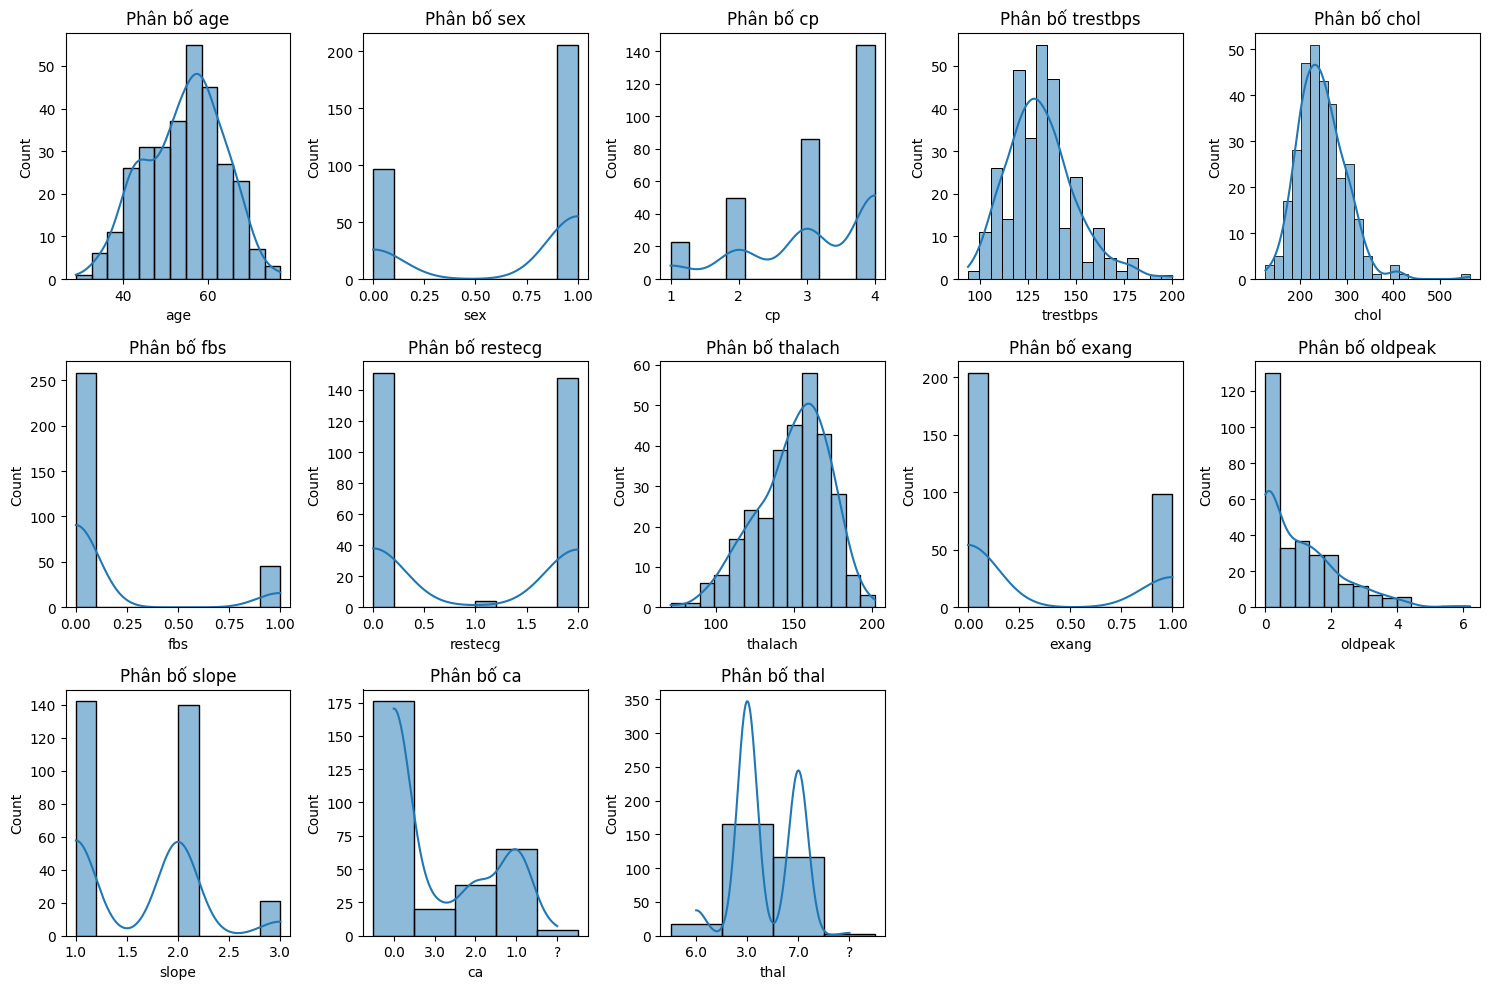


Số lượng giá trị missing sau khi xử lý:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Logistic Regression Accuracy: 0.5409836065573771


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.5409836065573771
Gradient Boosting Accuracy: 0.4918032786885246
SVM Accuracy: 0.5573770491803278


In [50]:
# Tên các cột
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Đọc dữ liệu
data = pd.read_csv('processed.cleveland.data', header=None, names=column_names)

# Mô tả dữ liệu
print("Thông tin dữ liệu:")
print(data.info())  # Kiểu dữ liệu của từng cột
print("\nMô tả thống kê:")
print(data.describe())  # Thống kê cơ bản về dữ liệu
print("\nSố lượng các giá trị bị thiếu:")
print(data.isnull().sum())  # Số lượng giá trị bị thiếu

# Vẽ biểu đồ phân bố dữ liệu
plt.figure(figsize=(15, 10))

# Vẽ phân bố của các cột numerical
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 5, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Phân bố {col}')
plt.tight_layout()
plt.show()

# Xử lý giá trị thiếu (missing data)
data.replace('?', np.nan, inplace=True)  # Thay thế dấu chấm hỏi thành NaN
data = data.apply(pd.to_numeric, errors='coerce')  # Chuyển đổi các cột thành kiểu số

# Kiểm tra lại các giá trị missing sau khi thay thế
print("\nSố lượng giá trị missing sau khi xử lý:")
print(data.isnull().sum())

# Xử lý missing values bằng phương pháp trung bình
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data))

# Xử lý dữ liệu imbalance (nếu cần)
# Ví dụ sử dụng SMOTE hoặc oversampling cho các lớp bị thiếu
# Cần cài thêm thư viện imbalanced-learn nếu áp dụng các phương pháp này

# Tách biến phụ thuộc (target) và biến độc lập (features)
X = data_imputed.iloc[:, :-1]
y = data_imputed.iloc[:, -1]

# Phân chia dữ liệu thành tập huấn luyện (training) và kiểm tra (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu (scaling) nếu cần
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Khởi tạo và huấn luyện Neural Network
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn.fit(X_train_scaled, y_train)
y_pred_nn = nn.predict(X_test_scaled)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))

# Khởi tạo và huấn luyện Gradient Boosting Regressor
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

# Khởi tạo và huấn luyện Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


Thông tin dữ liệu VA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB
None

Mô tả thống kê VA:
              age         sex          cp     restecg         num
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean    59.350000    0.970000    3.505000    0.735000    

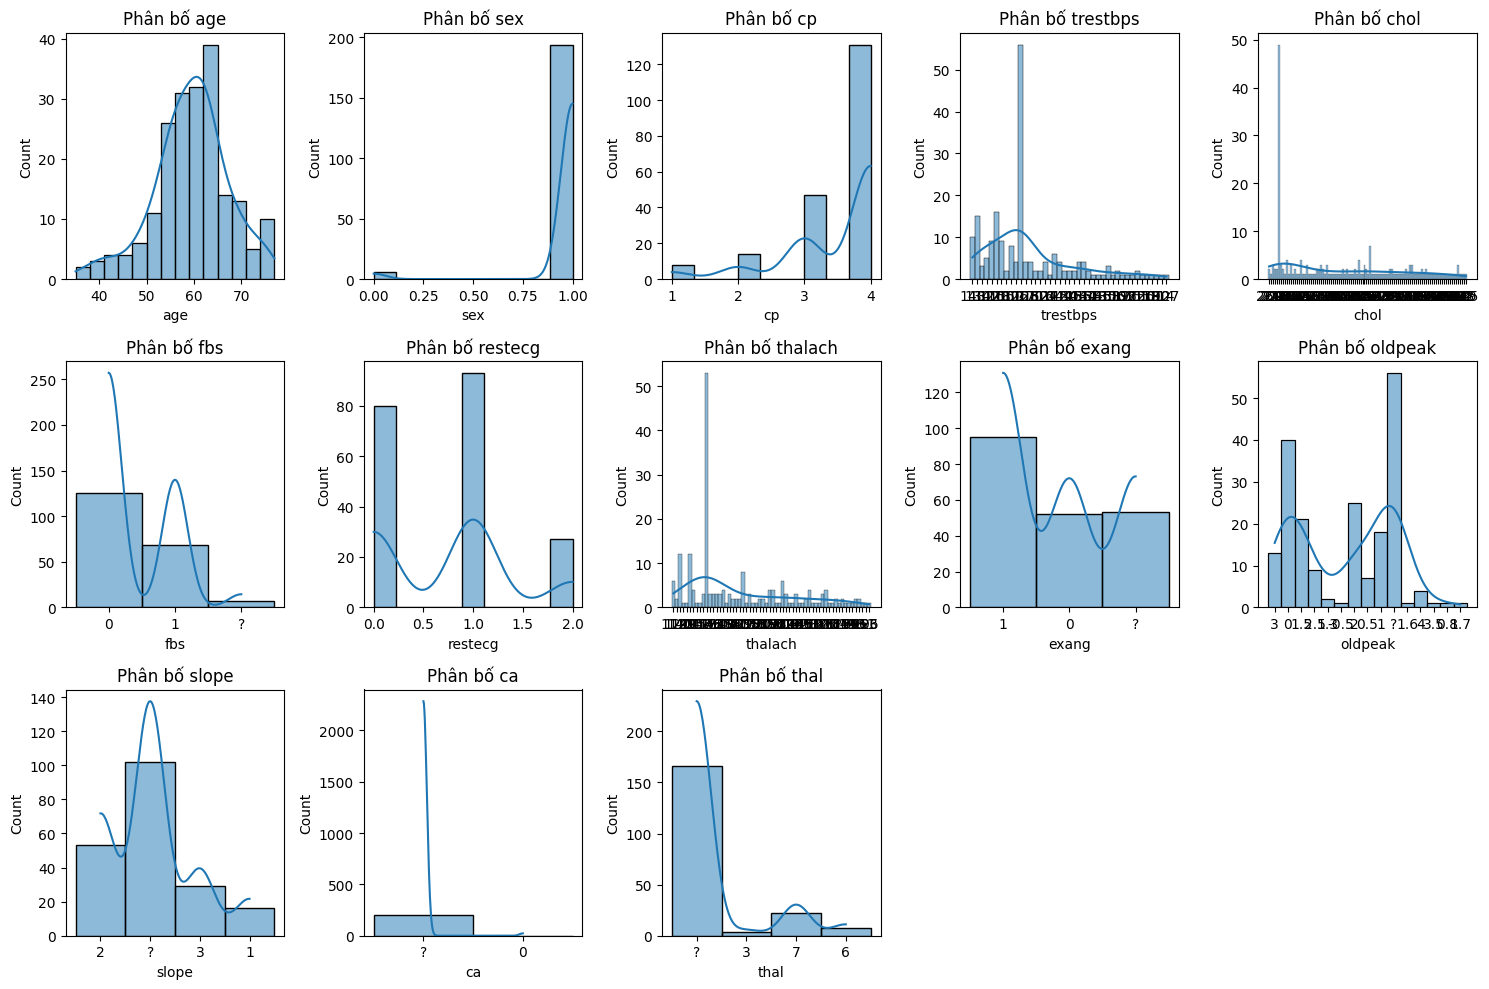


Số lượng giá trị missing sau khi xử lý VA:
age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

Logistic Regression Accuracy VA: 0.225


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy VA: 0.225
Gradient Boosting Accuracy VA: 0.3
SVM Accuracy VA: 0.25


In [53]:
# Đọc dữ liệu processed.va.data
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data_va = pd.read_csv('processed.va.data', header=None, names=column_names)

# Mô tả dữ liệu
print("Thông tin dữ liệu VA:")
print(data_va.info())  # Kiểu dữ liệu của từng cột
print("\nMô tả thống kê VA:")
print(data_va.describe())  # Thống kê cơ bản về dữ liệu
print("\nSố lượng các giá trị bị thiếu VA:")
print(data_va.isnull().sum())  # Số lượng giá trị bị thiếu

# Vẽ biểu đồ phân bố dữ liệu
plt.figure(figsize=(15, 10))

# Vẽ phân bố của các cột numerical
for i, col in enumerate(data_va.columns[:-1]):
    plt.subplot(3, 5, i+1)
    sns.histplot(data_va[col], kde=True)
    plt.title(f'Phân bố {col}')
plt.tight_layout()
plt.show()

# Xử lý giá trị thiếu (missing data)
data_va.replace('?', np.nan, inplace=True)  # Thay thế dấu chấm hỏi thành NaN
data_va = data_va.apply(pd.to_numeric, errors='coerce')  # Chuyển đổi các cột thành kiểu số

# Kiểm tra lại các giá trị missing sau khi xử lý
print("\nSố lượng giá trị missing sau khi xử lý VA:")
print(data_va.isnull().sum())

# Xử lý missing values bằng phương pháp trung bình
imputer = SimpleImputer(strategy='mean')
data_va_imputed = pd.DataFrame(imputer.fit_transform(data_va))

# Tách biến phụ thuộc (target) và biến độc lập (features)
X_va = data_va_imputed.iloc[:, :-1]
y_va = data_va_imputed.iloc[:, -1]

# Phân chia dữ liệu thành tập huấn luyện (training) và kiểm tra (test)
X_train_va, X_test_va, y_train_va, y_test_va = train_test_split(X_va, y_va, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_va_scaled = scaler.fit_transform(X_train_va)
X_test_va_scaled = scaler.transform(X_test_va)

# Huấn luyện các mô hình và đánh giá
# Logistic Regression
log_reg_va = LogisticRegression(max_iter=10000)
log_reg_va.fit(X_train_va_scaled, y_train_va)
y_pred_log_reg_va = log_reg_va.predict(X_test_va_scaled)
print("\nLogistic Regression Accuracy VA:", accuracy_score(y_test_va, y_pred_log_reg_va))

# Neural Network
nn_va = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn_va.fit(X_train_va_scaled, y_train_va)
y_pred_nn_va = nn_va.predict(X_test_va_scaled)
print("Neural Network Accuracy VA:", accuracy_score(y_test_va, y_pred_nn_va))

# Gradient Boosting Regressor
gb_va = GradientBoostingClassifier()
gb_va.fit(X_train_va_scaled, y_train_va)
y_pred_gb_va = gb_va.predict(X_test_va_scaled)
print("Gradient Boosting Accuracy VA:", accuracy_score(y_test_va, y_pred_gb_va))

# Support Vector Machine
svm_va = SVC(kernel='linear')
svm_va.fit(X_train_va_scaled, y_train_va)
y_pred_svm_va = svm_va.predict(X_test_va_scaled)
print("SVM Accuracy VA:", accuracy_score(y_test_va, y_pred_svm_va))


Thông tin dữ liệu Switzerland:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       123 non-null    int64 
 1   sex       123 non-null    int64 
 2   cp        123 non-null    int64 
 3   trestbps  123 non-null    object
 4   chol      123 non-null    int64 
 5   fbs       123 non-null    object
 6   restecg   123 non-null    object
 7   thalach   123 non-null    object
 8   exang     123 non-null    object
 9   oldpeak   123 non-null    object
 10  slope     123 non-null    object
 11  ca        123 non-null    object
 12  thal      123 non-null    object
 13  num       123 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 13.6+ KB
None

Mô tả thống kê Switzerland:
              age         sex          cp   chol         num
count  123.000000  123.000000  123.000000  123.0  123.000000
mean    55.317073    0.918699    3.699187    0.0 

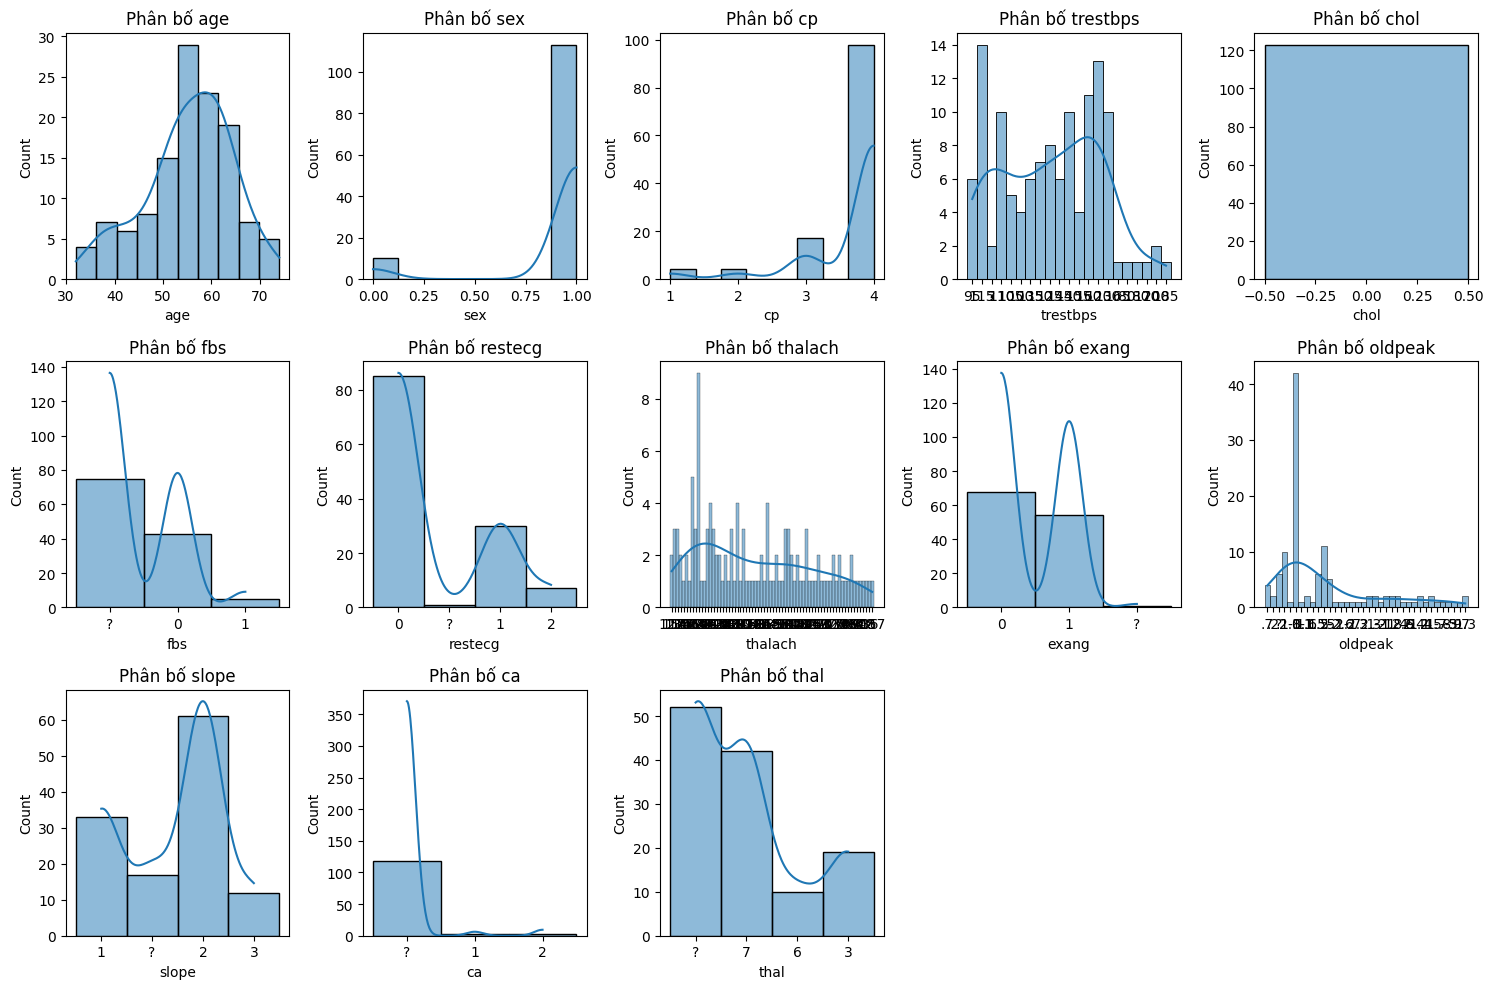


Số lượng giá trị missing sau khi xử lý Switzerland:
age           0
sex           0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
num           0
dtype: int64

Logistic Regression Accuracy Switzerland: 0.4
Neural Network Accuracy Switzerland: 0.32
Gradient Boosting Accuracy Switzerland: 0.16
SVM Accuracy Switzerland: 0.4


In [54]:
# Đọc dữ liệu processed.switzerland.data
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data_switzerland = pd.read_csv('processed.switzerland.data', header=None, names=column_names)

# Mô tả dữ liệu
print("Thông tin dữ liệu Switzerland:")
print(data_switzerland.info())  # Kiểu dữ liệu của từng cột
print("\nMô tả thống kê Switzerland:")
print(data_switzerland.describe())  # Thống kê cơ bản về dữ liệu
print("\nSố lượng các giá trị bị thiếu Switzerland:")
print(data_switzerland.isnull().sum())  # Số lượng giá trị bị thiếu

# Vẽ biểu đồ phân bố dữ liệu
plt.figure(figsize=(15, 10))

# Vẽ phân bố của các cột numerical
for i, col in enumerate(data_switzerland.columns[:-1]):
    plt.subplot(3, 5, i+1)
    sns.histplot(data_switzerland[col], kde=True)
    plt.title(f'Phân bố {col}')
plt.tight_layout()
plt.show()

# Xử lý giá trị thiếu (missing data)
data_switzerland.replace('?', np.nan, inplace=True)  # Thay thế dấu chấm hỏi thành NaN
data_switzerland = data_switzerland.apply(pd.to_numeric, errors='coerce')  # Chuyển đổi các cột thành kiểu số

# Kiểm tra lại các giá trị missing sau khi xử lý
print("\nSố lượng giá trị missing sau khi xử lý Switzerland:")
print(data_switzerland.isnull().sum())

# Xử lý missing values bằng phương pháp trung bình
imputer = SimpleImputer(strategy='mean')
data_switzerland_imputed = pd.DataFrame(imputer.fit_transform(data_switzerland))

# Tách biến phụ thuộc (target) và biến độc lập (features)
X_switzerland = data_switzerland_imputed.iloc[:, :-1]
y_switzerland = data_switzerland_imputed.iloc[:, -1]

# Phân chia dữ liệu thành tập huấn luyện (training) và kiểm tra (test)
X_train_switzerland, X_test_switzerland, y_train_switzerland, y_test_switzerland = train_test_split(X_switzerland, y_switzerland, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_switzerland_scaled = scaler.fit_transform(X_train_switzerland)
X_test_switzerland_scaled = scaler.transform(X_test_switzerland)

# Huấn luyện các mô hình và đánh giá
# Logistic Regression
log_reg_switzerland = LogisticRegression(max_iter=10000)
log_reg_switzerland.fit(X_train_switzerland_scaled, y_train_switzerland)
y_pred_log_reg_switzerland = log_reg_switzerland.predict(X_test_switzerland_scaled)
print("\nLogistic Regression Accuracy Switzerland:", accuracy_score(y_test_switzerland, y_pred_log_reg_switzerland))

# Neural Network
nn_switzerland = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn_switzerland.fit(X_train_switzerland_scaled, y_train_switzerland)
y_pred_nn_switzerland = nn_switzerland.predict(X_test_switzerland_scaled)
print("Neural Network Accuracy Switzerland:", accuracy_score(y_test_switzerland, y_pred_nn_switzerland))

# Gradient Boosting Regressor
gb_switzerland = GradientBoostingClassifier()
gb_switzerland.fit(X_train_switzerland_scaled, y_train_switzerland)
y_pred_gb_switzerland = gb_switzerland.predict(X_test_switzerland_scaled)
print("Gradient Boosting Accuracy Switzerland:", accuracy_score(y_test_switzerland, y_pred_gb_switzerland))

# Support Vector Machine
svm_switzerland = SVC(kernel='linear')
svm_switzerland.fit(X_train_switzerland_scaled, y_train_switzerland)
y_pred_svm_switzerland = svm_switzerland.predict(X_test_switzerland_scaled)
print("SVM Accuracy Switzerland:", accuracy_score(y_test_switzerland, y_pred_svm_switzerland))


Thông tin dữ liệu Hungarian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB
None

Mô tả thống kê Hungarian:
              age         sex          cp     oldpeak         num
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    47.8265

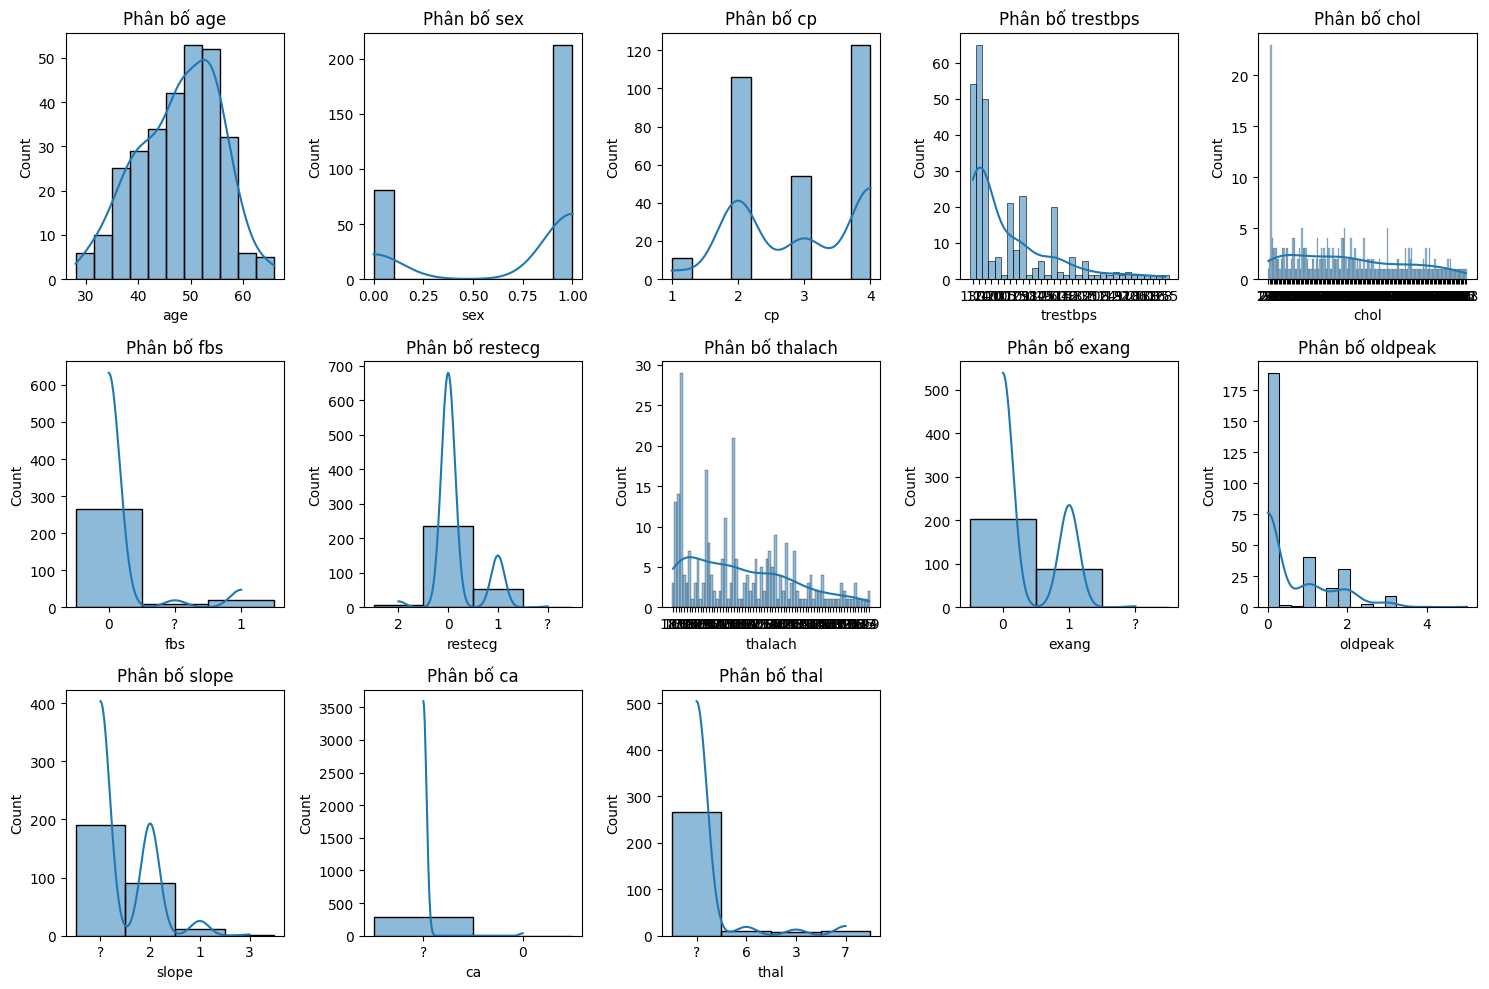


Số lượng giá trị missing sau khi xử lý Hungarian:
age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64

Logistic Regression Accuracy Hungarian: 0.8983050847457628


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy Hungarian: 0.847457627118644
Gradient Boosting Accuracy Hungarian: 0.7966101694915254
SVM Accuracy Hungarian: 0.8813559322033898


In [55]:
# Đọc dữ liệu processed.hungarian.data
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data_hungarian = pd.read_csv('processed.hungarian.data', header=None, names=column_names)

# Mô tả dữ liệu
print("Thông tin dữ liệu Hungarian:")
print(data_hungarian.info())  # Kiểu dữ liệu của từng cột
print("\nMô tả thống kê Hungarian:")
print(data_hungarian.describe())  # Thống kê cơ bản về dữ liệu
print("\nSố lượng các giá trị bị thiếu Hungarian:")
print(data_hungarian.isnull().sum())  # Số lượng giá trị bị thiếu

# Vẽ biểu đồ phân bố dữ liệu
plt.figure(figsize=(15, 10))

# Vẽ phân bố của các cột numerical
for i, col in enumerate(data_hungarian.columns[:-1]):
    plt.subplot(3, 5, i+1)
    sns.histplot(data_hungarian[col], kde=True)
    plt.title(f'Phân bố {col}')
plt.tight_layout()
plt.show()

# Xử lý giá trị thiếu (missing data)
data_hungarian.replace('?', np.nan, inplace=True)  # Thay thế dấu chấm hỏi thành NaN
data_hungarian = data_hungarian.apply(pd.to_numeric, errors='coerce')  # Chuyển đổi các cột thành kiểu số

# Kiểm tra lại các giá trị missing sau khi xử lý
print("\nSố lượng giá trị missing sau khi xử lý Hungarian:")
print(data_hungarian.isnull().sum())

# Xử lý missing values bằng phương pháp trung bình
imputer = SimpleImputer(strategy='mean')
data_hungarian_imputed = pd.DataFrame(imputer.fit_transform(data_hungarian))

# Tách biến phụ thuộc (target) và biến độc lập (features)
X_hungarian = data_hungarian_imputed.iloc[:, :-1]
y_hungarian = data_hungarian_imputed.iloc[:, -1]

# Phân chia dữ liệu thành tập huấn luyện (training) và kiểm tra (test)
X_train_hungarian, X_test_hungarian, y_train_hungarian, y_test_hungarian = train_test_split(X_hungarian, y_hungarian, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_hungarian_scaled = scaler.fit_transform(X_train_hungarian)
X_test_hungarian_scaled = scaler.transform(X_test_hungarian)

# Huấn luyện các mô hình và đánh giá
# Logistic Regression
log_reg_hungarian = LogisticRegression(max_iter=10000)
log_reg_hungarian.fit(X_train_hungarian_scaled, y_train_hungarian)
y_pred_log_reg_hungarian = log_reg_hungarian.predict(X_test_hungarian_scaled)
print("\nLogistic Regression Accuracy Hungarian:", accuracy_score(y_test_hungarian, y_pred_log_reg_hungarian))

# Neural Network
nn_hungarian = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn_hungarian.fit(X_train_hungarian_scaled, y_train_hungarian)
y_pred_nn_hungarian = nn_hungarian.predict(X_test_hungarian_scaled)
print("Neural Network Accuracy Hungarian:", accuracy_score(y_test_hungarian, y_pred_nn_hungarian))

# Gradient Boosting Regressor
gb_hungarian = GradientBoostingClassifier()
gb_hungarian.fit(X_train_hungarian_scaled, y_train_hungarian)
y_pred_gb_hungarian = gb_hungarian.predict(X_test_hungarian_scaled)
print("Gradient Boosting Accuracy Hungarian:", accuracy_score(y_test_hungarian, y_pred_gb_hungarian))

# Support Vector Machine
svm_hungarian = SVC(kernel='linear')
svm_hungarian.fit(X_train_hungarian_scaled, y_train_hungarian)
y_pred_svm_hungarian = svm_hungarian.predict(X_test_hungarian_scaled)
print("SVM Accuracy Hungarian:", accuracy_score(y_test_hungarian, y_pred_svm_hungarian))


In [61]:
# Kết quả các mô hình (accuracy)
results = {
    "Dataset": ['Cleveland', 'Switzerland', 'Hungarian','Long Beach'],
    "Logistic Regression": [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test_switzerland, y_pred_log_reg_switzerland),
        accuracy_score(y_test_hungarian, y_pred_log_reg_hungarian),
        accuracy_score(y_test_va, y_pred_log_reg_va),
    ],
    "Neural Network": [
        accuracy_score(y_test, y_pred_nn),
        accuracy_score(y_test_switzerland, y_pred_nn_switzerland),
        accuracy_score(y_test_hungarian, y_pred_nn_hungarian),
        accuracy_score(y_test_va, y_pred_nn_va),
    ],
    "Gradient Boosting": [
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test_switzerland, y_pred_gb_switzerland),
        accuracy_score(y_test_hungarian, y_pred_gb_hungarian),
        accuracy_score(y_test_va, y_pred_gb_va),
    ],
    "SVM": [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test_switzerland, y_pred_svm_switzerland),
        accuracy_score(y_test_hungarian, y_pred_svm_hungarian),
        accuracy_score(y_test_va, y_pred_svm_va),
    ]
}

# Chuyển kết quả thành DataFrame
results_df = pd.DataFrame(results)

# Hiển thị kết quả
print(results_df)


       Dataset  Logistic Regression  Neural Network  Gradient Boosting  \
0    Cleveland             0.557377        0.491803           0.491803   
1  Switzerland             0.400000        0.320000           0.160000   
2    Hungarian             0.898305        0.847458           0.796610   
3   Long Beach             0.225000        0.225000           0.300000   

        SVM  
0  0.557377  
1  0.400000  
2  0.881356  
3  0.250000  


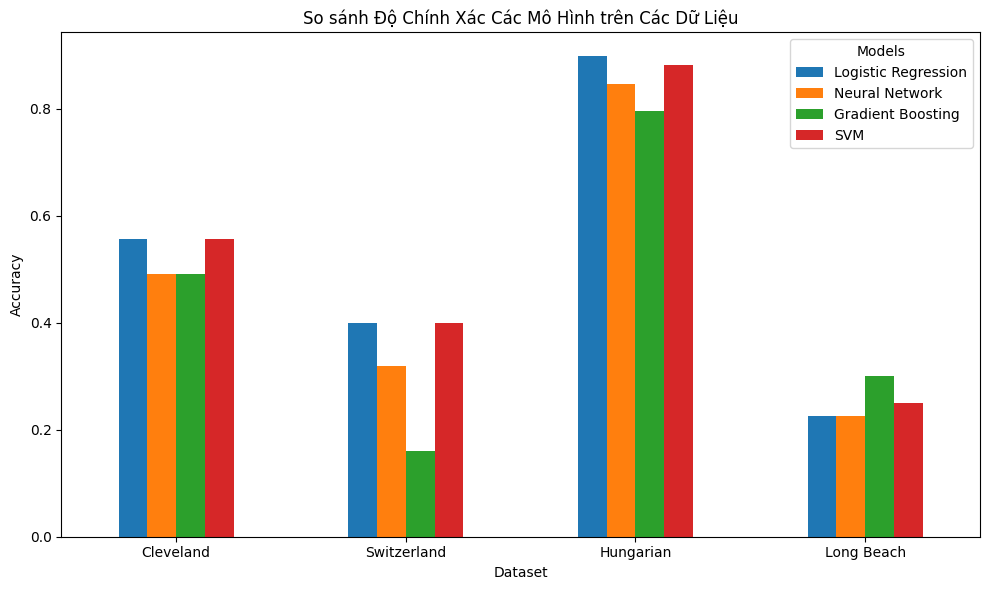

In [62]:
# Vẽ biểu đồ so sánh độ chính xác của các mô hình
results_df.set_index('Dataset').plot(kind='bar', figsize=(10, 6))

plt.title('So sánh Độ Chính Xác Các Mô Hình trên Các Dữ Liệu')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.tight_layout()
plt.show()
